In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from math import sqrt

pd.set_option('display.max_columns', None)

In [2]:
X_train = pd.read_csv('X_train.csv', index_col = 0)
X_train = X_train.reset_index(drop = True)
X_train = X_train.drop(['index', 'item_type', 'country_code', 'currency', 'inAlbum', 'genre', 'tags', 'day',
                       'coded_country_code', 'coded_currency', 'coded_genre', 'coded_tags'], axis = 1)
X_train.head()

,item_price,numTracks,albumRelease,BC_friday,item_type_a,item_type_t,country_code_ad,country_code_ae,country_code_am,country_code_ar,country_code_at,country_code_au,country_code_aw,country_code_az,country_code_ba,country_code_bb,country_code_be,country_code_bg,country_code_bh,country_code_bm,country_code_bn,country_code_bo,country_code_br,country_code_bs,country_code_bw,country_code_by,country_code_c2,country_code_ca,country_code_ch,country_code_cl,country_code_cn,country_code_co,country_code_cr,country_code_cy,country_code_cz,country_code_de,country_code_dk,country_code_do,country_code_dz,country_code_ec,country_code_ee,country_code_eg,country_code_es,country_code_fi,country_code_fr,country_code_gb,country_code_ge,country_code_gf,country_code_gg,country_code_gi,country_code_gl,country_code_gp,country_code_gr,country_code_gt,country_code_gu,country_code_hk,country_code_hn,country_code_hr,country_code_hu,country_code_id,country_code_ie,country_code_il,country_code_im,country_code_in,country_code_is,country_code_it,country_code_je,country_code_jm,country_code_jo,country_code_jp,country_code_ke,country_code_kg,country_code_kh,country_code_kr,country_code_kw,country_code_kz,country_code_lb,country_code_li,country_code_lk,country_code_lt,country_code_lu,country_code_lv,country_code_ma,country_code_md,country_code_me,country_code_mk,country_code_mo,country_code_mq,country_code_mt,country_code_mu,country_code_mx,country_code_my,country_code_na,country_code_nc,country_code_ni,country_code_nl,country_code_no,country_code_nz,country_code_om,country_code_pa,country_code_pe,country_code_pf,country_code_ph,country_code_pk,country_code_pl,country_code_pr,country_code_ps,country_code_pt,country_code_py,country_code_qa,country_code_re,country_code_ro,country_code_rs,country_code_ru,country_code_sa,country_code_se,country_code_sg,country_code_si,country_code_sk,country_code_sn,country_code_sv,country_code_th,country_code_tn,country_code_tr,country_code_tt,country_code_tw,country_code_ua,country_code_ug,country_code_us,country_code_uy,country_code_ve,country_code_vn,country_code_xk,country_code_za,currency_AUD,currency_CAD,currency_CHF,currency_CZK,currency_DKK,currency_EUR,currency_GBP,currency_HKD,currency_HUF,currency_ILS,currency_JPY,currency_MXN,currency_NOK,currency_NZD,currency_PLN,currency_SEK,currency_SGD,currency_USD,genre_acoustic,genre_alternative,genre_ambient,genre_audiobooks,genre_blues,genre_classical,genre_comedy,genre_country,genre_devotional,genre_electronic,genre_experimental,genre_folk,genre_funk,genre_hip-hop-rap,genre_jazz,genre_kids,genre_latin,genre_metal,genre_other,genre_podcasts,genre_pop,genre_punk,genre_r-b-soul,genre_reggae,genre_rock,genre_soundtrack,genre_spoken-word,genre_world,inAlbum_in,inAlbum_is,inAlbum_not,tags_140,tags_2step,tags_80s,tags_acid,tags_acoustic,tags_afrobeat,tags_alternative,tags_alternativerock,tags_ambientelectronic,tags_americana,tags_atmospheric,tags_atmosphericblackmetal,tags_avantgarde,tags_bass,tags_bassmusic,tags_beats,tags_berlin,tags_blackmetal,tags_blues,tags_breakbeat,tags_breaks,tags_brokenbeat,tags_chicago,tags_chillout,tags_chillwave,tags_coldwave,tags_comedy,tags_dance,tags_darkambient,tags_darktechno,tags_darkwave,tags_deathmetal,tags_deephouse,tags_disco,tags_diy,tags_doom,tags_downtempo,tags_dreampop,tags_drone,tags_drumbass,tags_dub,tags_dubstep,tags_ebm,tags_edm,tags_electro,tags_electronic,tags_electronica,tags_experimental,tags_folk,tags_funk,tags_garage,tags_hardcore,tags_hardrock,tags_hardtechno,tags_hiphop,tags_hiphop/rap,tags_house,tags_idm,tags_indie,tags_indierock,tags_london,tags_losangeles,tags_melbourne,tags_metal,tags_newyork,tags_other,tags_paris,tags_poppunk,tags_progressiverock,tags_punk,tags_rb,tags_rb/soul,tags_rock,tags_spokenword,tags_techno,tags_unitedkingdom,day_0,day_1,day_2,day_3,day_4,day_5,day_6
0,4.69,9.0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0

In [3]:
X_valid = pd.read_csv('X_valid.csv', index_col = 0)
X_valid = X_valid.reset_index(drop = True)
X_valid = X_valid.drop(['index', 'item_type', 'country_code', 'currency', 'inAlbum', 'genre', 'tags', 'day',
                       'coded_country_code', 'coded_currency', 'coded_genre', 'coded_tags'], axis = 1)
X_valid.head()

,item_price,numTracks,albumRelease,BC_friday,item_type_a,item_type_t,country_code_ad,country_code_ae,country_code_am,country_code_ar,country_code_at,country_code_au,country_code_aw,country_code_az,country_code_ba,country_code_bb,country_code_be,country_code_bg,country_code_bh,country_code_bm,country_code_bn,country_code_bo,country_code_br,country_code_bs,country_code_bw,country_code_by,country_code_c2,country_code_ca,country_code_ch,country_code_cl,country_code_cn,country_code_co,country_code_cr,country_code_cy,country_code_cz,country_code_de,country_code_dk,country_code_do,country_code_dz,country_code_ec,country_code_ee,country_code_eg,country_code_es,country_code_fi,country_code_fr,country_code_gb,country_code_ge,country_code_gf,country_code_gg,country_code_gi,country_code_gl,country_code_gp,country_code_gr,country_code_gt,country_code_gu,country_code_hk,country_code_hn,country_code_hr,country_code_hu,country_code_id,country_code_ie,country_code_il,country_code_im,country_code_in,country_code_is,country_code_it,country_code_je,country_code_jm,country_code_jo,country_code_jp,country_code_ke,country_code_kg,country_code_kh,country_code_kr,country_code_kw,country_code_kz,country_code_lb,country_code_li,country_code_lk,country_code_lt,country_code_lu,country_code_lv,country_code_ma,country_code_md,country_code_me,country_code_mk,country_code_mo,country_code_mq,country_code_mt,country_code_mu,country_code_mx,country_code_my,country_code_na,country_code_nc,country_code_ni,country_code_nl,country_code_no,country_code_nz,country_code_om,country_code_pa,country_code_pe,country_code_pf,country_code_ph,country_code_pk,country_code_pl,country_code_pr,country_code_ps,country_code_pt,country_code_py,country_code_qa,country_code_re,country_code_ro,country_code_rs,country_code_ru,country_code_sa,country_code_se,country_code_sg,country_code_si,country_code_sk,country_code_sn,country_code_sv,country_code_th,country_code_tn,country_code_tr,country_code_tt,country_code_tw,country_code_ua,country_code_ug,country_code_us,country_code_uy,country_code_ve,country_code_vn,country_code_xk,country_code_za,currency_AUD,currency_CAD,currency_CHF,currency_CZK,currency_DKK,currency_EUR,currency_GBP,currency_HKD,currency_HUF,currency_ILS,currency_JPY,currency_MXN,currency_NOK,currency_NZD,currency_PLN,currency_SEK,currency_SGD,currency_USD,genre_acoustic,genre_alternative,genre_ambient,genre_audiobooks,genre_blues,genre_classical,genre_comedy,genre_country,genre_devotional,genre_electronic,genre_experimental,genre_folk,genre_funk,genre_hip-hop-rap,genre_jazz,genre_kids,genre_latin,genre_metal,genre_other,genre_podcasts,genre_pop,genre_punk,genre_r-b-soul,genre_reggae,genre_rock,genre_soundtrack,genre_spoken-word,genre_world,inAlbum_in,inAlbum_is,inAlbum_not,tags_140,tags_2step,tags_80s,tags_acid,tags_acoustic,tags_afrobeat,tags_alternative,tags_alternativerock,tags_ambientelectronic,tags_americana,tags_atmospheric,tags_atmosphericblackmetal,tags_avantgarde,tags_bass,tags_bassmusic,tags_beats,tags_berlin,tags_blackmetal,tags_blues,tags_breakbeat,tags_breaks,tags_brokenbeat,tags_chicago,tags_chillout,tags_chillwave,tags_coldwave,tags_comedy,tags_dance,tags_darkambient,tags_darktechno,tags_darkwave,tags_deathmetal,tags_deephouse,tags_disco,tags_diy,tags_doom,tags_downtempo,tags_dreampop,tags_drone,tags_drumbass,tags_dub,tags_dubstep,tags_ebm,tags_edm,tags_electro,tags_electronic,tags_electronica,tags_experimental,tags_folk,tags_funk,tags_garage,tags_hardcore,tags_hardrock,tags_hardtechno,tags_hiphop,tags_hiphop/rap,tags_house,tags_idm,tags_indie,tags_indierock,tags_london,tags_losangeles,tags_melbourne,tags_metal,tags_newyork,tags_other,tags_paris,tags_poppunk,tags_progressiverock,tags_punk,tags_rb,tags_rb/soul,tags_rock,tags_spokenword,tags_techno,tags_unitedkingdom,day_0,day_1,day_2,day_3,day_4,day_5,day_6
0,1.78,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [4]:
X_test = pd.read_csv('X_test.csv', index_col = 0)
X_test = X_test.reset_index(drop = True)
X_test = X_test.drop(['index', 'item_type', 'country_code', 'currency', 'inAlbum', 'genre', 'tags', 'day',
                       'coded_country_code', 'coded_currency', 'coded_genre', 'coded_tags'], axis = 1)
X_test.head()

,item_price,numTracks,albumRelease,BC_friday,item_type_a,item_type_t,country_code_ad,country_code_ae,country_code_am,country_code_ar,country_code_at,country_code_au,country_code_aw,country_code_az,country_code_ba,country_code_bb,country_code_be,country_code_bg,country_code_bh,country_code_bm,country_code_bn,country_code_bo,country_code_br,country_code_bs,country_code_bw,country_code_by,country_code_c2,country_code_ca,country_code_ch,country_code_cl,country_code_cn,country_code_co,country_code_cr,country_code_cy,country_code_cz,country_code_de,country_code_dk,country_code_do,country_code_dz,country_code_ec,country_code_ee,country_code_eg,country_code_es,country_code_fi,country_code_fr,country_code_gb,country_code_ge,country_code_gf,country_code_gg,country_code_gi,country_code_gl,country_code_gp,country_code_gr,country_code_gt,country_code_gu,country_code_hk,country_code_hn,country_code_hr,country_code_hu,country_code_id,country_code_ie,country_code_il,country_code_im,country_code_in,country_code_is,country_code_it,country_code_je,country_code_jm,country_code_jo,country_code_jp,country_code_ke,country_code_kg,country_code_kh,country_code_kr,country_code_kw,country_code_kz,country_code_lb,country_code_li,country_code_lk,country_code_lt,country_code_lu,country_code_lv,country_code_ma,country_code_md,country_code_me,country_code_mk,country_code_mo,country_code_mq,country_code_mt,country_code_mu,country_code_mx,country_code_my,country_code_na,country_code_nc,country_code_ni,country_code_nl,country_code_no,country_code_nz,country_code_om,country_code_pa,country_code_pe,country_code_pf,country_code_ph,country_code_pk,country_code_pl,country_code_pr,country_code_ps,country_code_pt,country_code_py,country_code_qa,country_code_re,country_code_ro,country_code_rs,country_code_ru,country_code_sa,country_code_se,country_code_sg,country_code_si,country_code_sk,country_code_sn,country_code_sv,country_code_th,country_code_tn,country_code_tr,country_code_tt,country_code_tw,country_code_ua,country_code_ug,country_code_us,country_code_uy,country_code_ve,country_code_vn,country_code_xk,country_code_za,currency_AUD,currency_CAD,currency_CHF,currency_CZK,currency_DKK,currency_EUR,currency_GBP,currency_HKD,currency_HUF,currency_ILS,currency_JPY,currency_MXN,currency_NOK,currency_NZD,currency_PLN,currency_SEK,currency_SGD,currency_USD,genre_acoustic,genre_alternative,genre_ambient,genre_audiobooks,genre_blues,genre_classical,genre_comedy,genre_country,genre_devotional,genre_electronic,genre_experimental,genre_folk,genre_funk,genre_hip-hop-rap,genre_jazz,genre_kids,genre_latin,genre_metal,genre_other,genre_podcasts,genre_pop,genre_punk,genre_r-b-soul,genre_reggae,genre_rock,genre_soundtrack,genre_spoken-word,genre_world,inAlbum_in,inAlbum_is,inAlbum_not,tags_140,tags_2step,tags_80s,tags_acid,tags_acoustic,tags_afrobeat,tags_alternative,tags_alternativerock,tags_ambientelectronic,tags_americana,tags_atmospheric,tags_atmosphericblackmetal,tags_avantgarde,tags_bass,tags_bassmusic,tags_beats,tags_berlin,tags_blackmetal,tags_blues,tags_breakbeat,tags_breaks,tags_brokenbeat,tags_chicago,tags_chillout,tags_chillwave,tags_coldwave,tags_comedy,tags_dance,tags_darkambient,tags_darktechno,tags_darkwave,tags_deathmetal,tags_deephouse,tags_disco,tags_diy,tags_doom,tags_downtempo,tags_dreampop,tags_drone,tags_drumbass,tags_dub,tags_dubstep,tags_ebm,tags_edm,tags_electro,tags_electronic,tags_electronica,tags_experimental,tags_folk,tags_funk,tags_garage,tags_hardcore,tags_hardrock,tags_hardtechno,tags_hiphop,tags_hiphop/rap,tags_house,tags_idm,tags_indie,tags_indierock,tags_london,tags_losangeles,tags_melbourne,tags_metal,tags_newyork,tags_other,tags_paris,tags_poppunk,tags_progressiverock,tags_punk,tags_rb,tags_rb/soul,tags_rock,tags_spokenword,tags_techno,tags_unitedkingdom,day_0,day_1,day_2,day_3,day_4,day_5,day_6
0,5.00,4.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [5]:
#standardize numerical columns: (value - mean) / std
dfs = [X_train, X_valid, X_test]
num_cols = ['item_price', 'numTracks', 'albumRelease']

for data in dfs:
    for x in num_cols:
        data[x] = (data[x] - np.mean(data[x])) / np.std(data[x])

In [6]:
X_train.head()

,item_price,numTracks,albumRelease,BC_friday,item_type_a,item_type_t,country_code_ad,country_code_ae,country_code_am,country_code_ar,country_code_at,country_code_au,country_code_aw,country_code_az,country_code_ba,country_code_bb,country_code_be,country_code_bg,country_code_bh,country_code_bm,country_code_bn,country_code_bo,country_code_br,country_code_bs,country_code_bw,country_code_by,country_code_c2,country_code_ca,country_code_ch,country_code_cl,country_code_cn,country_code_co,country_code_cr,country_code_cy,country_code_cz,country_code_de,country_code_dk,country_code_do,country_code_dz,country_code_ec,country_code_ee,country_code_eg,country_code_es,country_code_fi,country_code_fr,country_code_gb,country_code_ge,country_code_gf,country_code_gg,country_code_gi,country_code_gl,country_code_gp,country_code_gr,country_code_gt,country_code_gu,country_code_hk,country_code_hn,country_code_hr,country_code_hu,country_code_id,country_code_ie,country_code_il,country_code_im,country_code_in,country_code_is,country_code_it,country_code_je,country_code_jm,country_code_jo,country_code_jp,country_code_ke,country_code_kg,country_code_kh,country_code_kr,country_code_kw,country_code_kz,country_code_lb,country_code_li,country_code_lk,country_code_lt,country_code_lu,country_code_lv,country_code_ma,country_code_md,country_code_me,country_code_mk,country_code_mo,country_code_mq,country_code_mt,country_code_mu,country_code_mx,country_code_my,country_code_na,country_code_nc,country_code_ni,country_code_nl,country_code_no,country_code_nz,country_code_om,country_code_pa,country_code_pe,country_code_pf,country_code_ph,country_code_pk,country_code_pl,country_code_pr,country_code_ps,country_code_pt,country_code_py,country_code_qa,country_code_re,country_code_ro,country_code_rs,country_code_ru,country_code_sa,country_code_se,country_code_sg,country_code_si,country_code_sk,country_code_sn,country_code_sv,country_code_th,country_code_tn,country_code_tr,country_code_tt,country_code_tw,country_code_ua,country_code_ug,country_code_us,country_code_uy,country_code_ve,country_code_vn,country_code_xk,country_code_za,currency_AUD,currency_CAD,currency_CHF,currency_CZK,currency_DKK,currency_EUR,currency_GBP,currency_HKD,currency_HUF,currency_ILS,currency_JPY,currency_MXN,currency_NOK,currency_NZD,currency_PLN,currency_SEK,currency_SGD,currency_USD,genre_acoustic,genre_alternative,genre_ambient,genre_audiobooks,genre_blues,genre_classical,genre_comedy,genre_country,genre_devotional,genre_electronic,genre_experimental,genre_folk,genre_funk,genre_hip-hop-rap,genre_jazz,genre_kids,genre_latin,genre_metal,genre_other,genre_podcasts,genre_pop,genre_punk,genre_r-b-soul,genre_reggae,genre_rock,genre_soundtrack,genre_spoken-word,genre_world,inAlbum_in,inAlbum_is,inAlbum_not,tags_140,tags_2step,tags_80s,tags_acid,tags_acoustic,tags_afrobeat,tags_alternative,tags_alternativerock,tags_ambientelectronic,tags_americana,tags_atmospheric,tags_atmosphericblackmetal,tags_avantgarde,tags_bass,tags_bassmusic,tags_beats,tags_berlin,tags_blackmetal,tags_blues,tags_breakbeat,tags_breaks,tags_brokenbeat,tags_chicago,tags_chillout,tags_chillwave,tags_coldwave,tags_comedy,tags_dance,tags_darkambient,tags_darktechno,tags_darkwave,tags_deathmetal,tags_deephouse,tags_disco,tags_diy,tags_doom,tags_downtempo,tags_dreampop,tags_drone,tags_drumbass,tags_dub,tags_dubstep,tags_ebm,tags_edm,tags_electro,tags_electronic,tags_electronica,tags_experimental,tags_folk,tags_funk,tags_garage,tags_hardcore,tags_hardrock,tags_hardtechno,tags_hiphop,tags_hiphop/rap,tags_house,tags_idm,tags_indie,tags_indierock,tags_london,tags_losangeles,tags_melbourne,tags_metal,tags_newyork,tags_other,tags_paris,tags_poppunk,tags_progressiverock,tags_punk,tags_rb,tags_rb/soul,tags_rock,tags_spokenword,tags_techno,tags_unitedkingdom,day_0,day_1,day_2,day_3,day_4,day_5,day_6
0,0.131991,0.279057,-0.379239,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [7]:
y_train = pd.read_csv('y_train.csv', index_col = 0)
y_train = y_train.reset_index(drop = True)

y_train.head()

,amount_paid_usd
0,4.69
1,1.18
2,3.00
3,10.00
4,1.00


In [8]:
y_valid = pd.read_csv('y_valid.csv', index_col = 0)
y_valid = y_valid.reset_index(drop = True)

y_valid.head()

,amount_paid_usd
0,1.78
1,2.00
2,9.00
3,10.00
4,5.15


In [9]:
y_test = pd.read_csv('y_test.csv', index_col = 0)
y_test = y_test.reset_index(drop = True)

y_test.head()

,amount_paid_usd
0,5.00
1,1.75
2,1.18
3,2.25
4,1.29


In [10]:
y_dfs = [y_train, y_valid, y_test]

for data in y_dfs:
    data['amount_paid_usd'] = (data['amount_paid_usd'] - np.mean(data['amount_paid_usd'])) / np.std(data['amount_paid_usd'])

In [11]:
len(X_train), len(y_train), len(X_valid), len(y_valid), len(X_test), len(y_test)

(398130, 398130, 132710, 132710, 132711, 132711)

In [12]:
y_train['amount_paid_usd'].min(), y_train['amount_paid_usd'].max()

(-0.8996162815728627, 35.096761782863894)

In [13]:
y_train.head()

,amount_paid_usd
0,-0.090689
1,-0.723057
2,-0.395163
3,0.865972
4,-0.755487


In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping

### Architecture testing

In [15]:
#1 Hidden layer
def nn_model1(n):
    model = Sequential()
    model.add(Dense(n, input_dim = X_train.shape[1], activation = 'relu'))
    model.add(BatchNormalization())
    model.add(Dense(units=1, activation = 'linear'))
    model.compile(loss = 'mse', optimizer = 'adam')
    return model

In [16]:
neurons = [32, 64, 128, 256, 512]

In [17]:
def train_nn(neurons):
    es = EarlyStopping(monitor = 'val_loss', mode='min', patience = 5, restore_best_weights = True)
    for n in neurons:
        nn_mod = nn_model1(n)
        print(nn_mod.summary())
        nn_mod.fit(X_train, y_train, batch_size = 25, epochs = 50, validation_data=(X_valid, y_valid), callbacks=[es])
        pred = nn_mod.predict(X_valid)
        print('RMSE on valid data:', sqrt(mse(y_valid, pred)))

In [18]:
mod1 = train_nn(neurons)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                8544      
                                                                 
 batch_normalization (BatchN  (None, 32)               128       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 8,705
Trainable params: 8,641
Non-trainable params: 64
_________________________________________________________________
None
Epoch 1/50
15926/15926 [==============================] - 18s 1ms/step - loss: 0.5416 - val_loss: 0.5272
Epoch 2/50
15926/15926 [==============================] - 18s 1ms/step - loss: 0.5243 - val_loss: 0.5609
Epoch 3/50
15926/15926 [============

Epoch 5/50
15926/15926 [==============================] - 31s 2ms/step - loss: 0.5144 - val_loss: 0.5845
Epoch 6/50
15926/15926 [==============================] - 30s 2ms/step - loss: 0.5130 - val_loss: 1.0676
Epoch 7/50
15926/15926 [==============================] - 31s 2ms/step - loss: 0.5117 - val_loss: 0.6329
Epoch 8/50
15926/15926 [==============================] - 29s 2ms/step - loss: 0.5110 - val_loss: 0.7996
Epoch 9/50
15926/15926 [==============================] - 31s 2ms/step - loss: 0.5108 - val_loss: 0.7016
Epoch 10/50
4148/4148 [==============================] - 3s 726us/step
RMSE on valid data: 0.7645306859039301


In [19]:
#2 hidden layers

def nn_model2(n):
    model = Sequential()
    model.add(Dense(n, input_dim = X_train.shape[1], activation = 'relu'))
    model.add(BatchNormalization())
    n = n/2
    model.add(Dense(n,  activation = 'relu'))
    model.add(BatchNormalization())
    model.add(Dense(units=1, activation = 'linear'))
    model.compile(loss = 'mse', optimizer = 'adam')
    return model

In [20]:
def train_nn(neurons):
    es = EarlyStopping(monitor = 'val_loss', mode='min', patience = 5, restore_best_weights = True)
    for n in neurons:
        nn_mod = nn_model2(n)
        print(nn_mod.summary())
        nn_mod.fit(X_train, y_train, batch_size = 25, epochs = 50, validation_data=(X_valid, y_valid), callbacks=[es])
        pred = nn_mod.predict(X_valid)
        print('RMSE on valid data:', sqrt(mse(y_valid, pred)))

In [21]:
mod2 = train_nn(neurons)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 32)                8544      
                                                                 
 batch_normalization_5 (Batc  (None, 32)               128       
 hNormalization)                                                 
                                                                 
 dense_11 (Dense)            (None, 16)                528       
                                                                 
 batch_normalization_6 (Batc  (None, 16)               64        
 hNormalization)                                                 
                                                                 
 dense_12 (Dense)            (None, 1)                 17        
                                                                 
Total params: 9,281
Trainable params: 9,185
Non-traina

4148/4148 [==============================] - 4s 909us/step
RMSE on valid data: 0.7206435336763949
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 512)               136704    
                                                                 
 batch_normalization_13 (Bat  (None, 512)              2048      
 chNormalization)                                                
                                                                 
 dense_23 (Dense)            (None, 256)               131328    
                                                                 
 batch_normalization_14 (Bat  (None, 256)              1024      
 chNormalization)                                                
                                                                 
 dense_24 (Dense)            (None, 1)                 257       
                      

In [22]:
#3 hidden layers

def nn_model3(n):
    model = Sequential()
    model.add(Dense(n, input_dim = X_train.shape[1], activation = 'relu'))
    model.add(BatchNormalization())
    n = n/2
    model.add(Dense(n,  activation = 'relu'))
    model.add(BatchNormalization())
    n = n/4
    model.add(Dense(n,  activation = 'relu'))
    model.add(BatchNormalization())
    model.add(Dense(units=1, activation = 'linear'))
    model.compile(loss = 'mse', optimizer = 'adam')
    return model

In [23]:
def train_nn(neurons):
    es = EarlyStopping(monitor = 'val_loss', mode='min', patience = 5, restore_best_weights = True)
    for n in neurons:
        nn_mod = nn_model3(n)
        print(nn_mod.summary())
        nn_mod.fit(X_train, y_train, batch_size = 25, epochs = 50, validation_data=(X_valid, y_valid), callbacks=[es])
        pred = nn_mod.predict(X_valid)
        print('RMSE on valid data:', sqrt(mse(y_valid, pred)))

In [24]:
mod3 = train_nn(neurons)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 32)                8544      
                                                                 
 batch_normalization_15 (Bat  (None, 32)               128       
 chNormalization)                                                
                                                                 
 dense_26 (Dense)            (None, 16)                528       
                                                                 
 batch_normalization_16 (Bat  (None, 16)               64        
 chNormalization)                                                
                                                                 
 dense_27 (Dense)            (None, 4)                 68        
                                                                 
 batch_normalization_17 (Bat  (None, 4)              

 chNormalization)                                                
                                                                 
 dense_38 (Dense)            (None, 128)               32896     
                                                                 
 batch_normalization_25 (Bat  (None, 128)              512       
 chNormalization)                                                
                                                                 
 dense_39 (Dense)            (None, 32)                4128      
                                                                 
 batch_normalization_26 (Bat  (None, 32)               128       
 chNormalization)                                                
                                                                 
 dense_40 (Dense)            (None, 1)                 33        
                                                                 
Total params: 107,073
Trainable params: 106,241
Non-trainable params: 832
__

In [25]:
# 4 hidden layers

def nn_model4(n):
    model = Sequential()
    model.add(Dense(n, input_dim = X_train.shape[1], activation = 'relu'))
    model.add(BatchNormalization())
    n = n/2
    model.add(Dense(n,  activation = 'relu'))
    model.add(BatchNormalization())
    n = n/4
    model.add(Dense(n,  activation = 'relu'))
    model.add(BatchNormalization())
    n = n/2
    model.add(Dense(n,  activation = 'relu'))
    model.add(BatchNormalization())
    model.add(Dense(units=1, activation = 'linear'))
    model.compile(loss = 'mse', optimizer = 'adam')
    return model

In [26]:
def train_nn(neurons):
    es = EarlyStopping(monitor = 'val_loss', mode='min', patience = 5, restore_best_weights = True)
    for n in neurons:
        nn_mod = nn_model4(n)
        print(nn_mod.summary())
        nn_mod.fit(X_train, y_train, batch_size = 25, epochs = 50, validation_data=(X_valid, y_valid), callbacks=[es])
        pred = nn_mod.predict(X_valid)
        print('RMSE on valid data:', sqrt(mse(y_valid, pred)))

In [27]:
mod4 = train_nn(neurons)

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_45 (Dense)            (None, 32)                8544      
                                                                 
 batch_normalization_30 (Bat  (None, 32)               128       
 chNormalization)                                                
                                                                 
 dense_46 (Dense)            (None, 16)                528       
                                                                 
 batch_normalization_31 (Bat  (None, 16)               64        
 chNormalization)                                                
                                                                 
 dense_47 (Dense)            (None, 4)                 68        
                                                                 
 batch_normalization_32 (Bat  (None, 4)              

                                                                 
Total params: 44,481
Trainable params: 44,049
Non-trainable params: 432
_________________________________________________________________
None
Epoch 1/50
15926/15926 [==============================] - 32s 2ms/step - loss: 0.5567 - val_loss: 0.4787
Epoch 2/50
15926/15926 [==============================] - 31s 2ms/step - loss: 0.5280 - val_loss: 0.5265
Epoch 3/50
15926/15926 [==============================] - 31s 2ms/step - loss: 0.5209 - val_loss: 0.5622
Epoch 4/50
15926/15926 [==============================] - 33s 2ms/step - loss: 0.5170 - val_loss: 0.5359
Epoch 5/50
15926/15926 [==============================] - 31s 2ms/step - loss: 0.5148 - val_loss: 0.5889
Epoch 6/50
4148/4148 [==============================] - 3s 799us/step
RMSE on valid data: 0.6918486773879052
Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 d

#### Optimal structure: 3 hidden layers, neurons 32, 16 and 4 respectively

In [28]:
#defining the model
def nn_model(act, opt):
    model = Sequential()
    model.add(Dense(32, input_dim=X_train.shape[1], activation = act))
    model.add(BatchNormalization())
    model.add(Dense(16, activation = act))
    model.add(BatchNormalization())
    model.add(Dense(4, activation = act))
    model.add(BatchNormalization())
    model.add(Dense(units=1, activation = 'linear'))
    model.compile(loss='mse', optimizer= opt)
    return model

In [29]:
optimizers = ['adam', 'RMSprop']
activation = ['relu', keras.layers.LeakyReLU(), 'linear']

In [30]:
def train_mod(optimizers, activation):
    es = EarlyStopping(monitor = 'val_loss', mode='min', patience = 5, restore_best_weights = True)
    for opt in optimizers:
        for act in activation:
            print(opt, act)
            nn_mod = nn_model(act, opt)
            print(nn_mod.summary())
            nn_mod.fit(X_train, y_train, batch_size = 25, epochs = 50, validation_data=(X_valid, y_valid), callbacks = [es])
            pred = nn_mod.predict(X_valid)
            print('RMSE on valid data:', sqrt(mse(y_valid, pred)))

In [31]:
mod5 = train_mod(optimizers, activation)

adam relu
Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_70 (Dense)            (None, 32)                8544      
                                                                 
 batch_normalization_50 (Bat  (None, 32)               128       
 chNormalization)                                                
                                                                 
 dense_71 (Dense)            (None, 16)                528       
                                                                 
 batch_normalization_51 (Bat  (None, 16)               64        
 chNormalization)                                                
                                                                 
 dense_72 (Dense)            (None, 4)                 68        
                                                                 
 batch_normalization_52 (Bat  (None, 4)    

 Layer (type)                Output Shape              Param #   
 dense_82 (Dense)            (None, 32)                8544      
                                                                 
 batch_normalization_59 (Bat  (None, 32)               128       
 chNormalization)                                                
                                                                 
 dense_83 (Dense)            (None, 16)                528       
                                                                 
 batch_normalization_60 (Bat  (None, 16)               64        
 chNormalization)                                                
                                                                 
 dense_84 (Dense)            (None, 4)                 68        
                                                                 
 batch_normalization_61 (Bat  (None, 4)                16        
 chNormalization)                                                
          

#### Best optimizer: Adam, Best activation: leaky relu

In [32]:
#defining the model
def nn_model():
    model = Sequential()
    model.add(Dense(32, input_dim=X_train.shape[1], activation = keras.layers.LeakyReLU()))
    model.add(BatchNormalization())
    model.add(Dense(16, activation = keras.layers.LeakyReLU()))
    model.add(BatchNormalization())
    model.add(Dense(4, activation = keras.layers.LeakyReLU()))
    model.add(BatchNormalization())
    model.add(Dense(units=1, activation = 'linear'))
    model.compile(loss='mse', optimizer= 'adam' )
    return model

In [33]:
batches = [25, 50, 75, 100, 150, 200]

In [34]:
def train_mod(batches):
    es = EarlyStopping(monitor = 'val_loss', mode='min', patience = 5, restore_best_weights = True)
    for b in batches:
        print(b)
        nn_mod = nn_model()
        print(nn_mod.summary())
        nn_mod.fit(X_train, y_train, batch_size = b, epochs = 50, validation_data=(X_valid, y_valid), callbacks = [es])
        pred = nn_mod.predict(X_valid)
        print('RMSE on valid data:', sqrt(mse(y_valid, pred)))

In [35]:
mod6 = train_mod(batches)

25
Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_94 (Dense)            (None, 32)                8544      
                                                                 
 batch_normalization_68 (Bat  (None, 32)               128       
 chNormalization)                                                
                                                                 
 dense_95 (Dense)            (None, 16)                528       
                                                                 
 batch_normalization_69 (Bat  (None, 16)               64        
 chNormalization)                                                
                                                                 
 dense_96 (Dense)            (None, 4)                 68        
                                                                 
 batch_normalization_70 (Bat  (None, 4)           

                                                                 
Total params: 9,353
Trainable params: 9,249
Non-trainable params: 104
_________________________________________________________________
None
Epoch 1/50
5309/5309 [==============================] - 12s 2ms/step - loss: 0.5357 - val_loss: 0.4745
Epoch 2/50
5309/5309 [==============================] - 10s 2ms/step - loss: 0.5117 - val_loss: 0.4736
Epoch 3/50
5309/5309 [==============================] - 9s 2ms/step - loss: 0.5071 - val_loss: 0.4720
Epoch 4/50
5309/5309 [==============================] - 10s 2ms/step - loss: 0.5045 - val_loss: 0.4685
Epoch 5/50
5309/5309 [==============================] - 10s 2ms/step - loss: 0.5028 - val_loss: 0.4670
Epoch 6/50
5309/5309 [==============================] - 10s 2ms/step - loss: 0.5016 - val_loss: 0.4699
Epoch 7/50
5309/5309 [==============================] - 10s 2ms/step - loss: 0.5005 - val_loss: 0.4655
Epoch 8/50
5309/5309 [==============================] - 10s 2ms/step - lo

Epoch 2/50
2655/2655 [==============================] - 5s 2ms/step - loss: 0.5062 - val_loss: 0.4729
Epoch 3/50
2655/2655 [==============================] - 6s 2ms/step - loss: 0.5016 - val_loss: 0.4694
Epoch 4/50
2655/2655 [==============================] - 5s 2ms/step - loss: 0.4987 - val_loss: 0.4679
Epoch 5/50
2655/2655 [==============================] - 5s 2ms/step - loss: 0.4966 - val_loss: 0.4703
Epoch 6/50
2655/2655 [==============================] - 6s 2ms/step - loss: 0.4953 - val_loss: 0.4664
Epoch 7/50
2655/2655 [==============================] - 5s 2ms/step - loss: 0.4941 - val_loss: 0.4674
Epoch 8/50
2655/2655 [==============================] - 5s 2ms/step - loss: 0.4935 - val_loss: 0.4654
Epoch 9/50
2655/2655 [==============================] - 5s 2ms/step - loss: 0.4918 - val_loss: 0.4666
Epoch 10/50
2655/2655 [==============================] - 5s 2ms/step - loss: 0.4913 - val_loss: 0.4637
Epoch 11/50
2655/2655 [==============================] - 4s 2ms/step - loss: 0.49

### Batch-size 100, epochs = 19

## Retrain on train + valid data and evaluate on test data

In [36]:
#retrain network
X_train2 = pd.concat([X_train, X_valid])
y_train2 = pd.concat([y_train, y_valid])

In [38]:
X_train2.shape, X_test.shape, y_train2.shape, y_test.shape

((530840, 266), (132711, 266), (530840, 1), (132711, 1))

In [39]:
#defining the model
def nn_model():
    model = Sequential()
    model.add(Dense(32, input_dim=X_train.shape[1], activation = keras.layers.LeakyReLU()))
    model.add(BatchNormalization())
    model.add(Dense(16, activation = keras.layers.LeakyReLU()))
    model.add(BatchNormalization())
    model.add(Dense(4, activation = keras.layers.LeakyReLU()))
    model.add(BatchNormalization())
    model.add(Dense(units=1, activation = 'linear'))
    model.compile(loss='mse', optimizer= 'adam' )
    return model

In [45]:
nn_mod = nn_model()
print(nn_mod.summary())
nn_mod.fit(X_train2, y_train2, batch_size = 100, epochs = 19)
pred = nn_mod.predict(X_test)
print('RMSE on test data:', sqrt(mse(y_test, pred)))
print('MAE on test data:', mae(y_test, pred))

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_122 (Dense)           (None, 32)                8544      
                                                                 
 batch_normalization_89 (Bat  (None, 32)               128       
 chNormalization)                                                
                                                                 
 dense_123 (Dense)           (None, 16)                528       
                                                                 
 batch_normalization_90 (Bat  (None, 16)               64        
 chNormalization)                                                
                                                                 
 dense_124 (Dense)           (None, 4)                 68        
                                                                 
 batch_normalization_91 (Bat  (None, 4)              

In [46]:
error_df = pd.DataFrame()
error_df['true'] = y_test
error_df['predicted'] = pred

In [48]:
error_df['error'] = error_df['true'] - error_df['predicted']

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

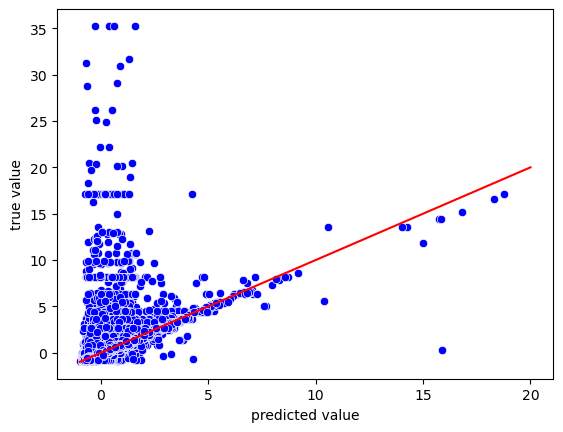

In [62]:
errors = sns.scatterplot(data = error_df, x = 'predicted', y = 'true', color = 'b')
#plt.axhline(y = 0, color = 'r')
plt.plot([-1, 20], [-1, 20], c = 'r')
plt.xlabel('predicted value')
plt.ylabel('true value')
plt.savefig('NN_errors.png')